# 1 - Estadisticos Descriptivos

## 1. Calculo de rango de variables

Antes que nada, se preparan las librerias y se importa el dataset.

In [8]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

seaborn.__version__

dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

Calculamos el rango de las variables

In [9]:
columnas_numericas = []
columnas_numericas += [col for col in dataset.columns if 'pf_identity' in col]
columnas_numericas += ['ef_score', 'ef_rank', 'hf_score', 'hf_rank']

rangos_variables = [(var, max(dataset[var]) - min(dataset[var])) for var in dataset[columnas_numericas]]
rangos_variables

[('pf_identity_legal', 10.0),
 ('pf_identity_parental_marriage', 10.0),
 ('pf_identity_parental_divorce', 10.0),
 ('pf_identity_parental', 10.0),
 ('pf_identity_sex_male', 10.0),
 ('pf_identity_sex_female', 10.0),
 ('pf_identity_sex', 10.0),
 ('pf_identity_divorce', 10.0),
 ('pf_identity', 10.0),
 ('ef_score', 6.31),
 ('ef_rank', 161.0),
 ('hf_score', 5.360486062),
 ('hf_rank', 161.0)]

Presentamos los valores minimo y maximo de cada variable, cuya diferencia resulta en el anterior rango

In [10]:
rangos_variables = [(var, max(dataset[var]), min(dataset[var])) for var in dataset[columnas_numericas]]
rangos_variables

[('pf_identity_legal', 10.0, 0.0),
 ('pf_identity_parental_marriage', 10.0, 0.0),
 ('pf_identity_parental_divorce', 10.0, 0.0),
 ('pf_identity_parental', 10.0, 0.0),
 ('pf_identity_sex_male', 10.0, 0.0),
 ('pf_identity_sex_female', 10.0, 0.0),
 ('pf_identity_sex', 10.0, 0.0),
 ('pf_identity_divorce', 10.0, 0.0),
 ('pf_identity', 10.0, 0.0),
 ('ef_score', 9.19, 2.88),
 ('ef_rank', 162.0, 1.0),
 ('hf_score', 9.126312939, 3.765826877),
 ('hf_rank', 162.0, 1.0)]

## 2. Comparaciones resto del mundo - latinoamerica

Hacemos primero un calculo total, y luego por a;o.

In [11]:
datos_latinoamerica = dataset[dataset['region'] == 'Latin America & the Caribbean']
datos_resto_mundo = dataset[dataset['region'] != 'Latin America & the Caribbean']

scores_importantes = ['hf_score'] + ['ef_score'] + ['pf_identity']

print('DATOS LATINOAMERICA (SIN ANUALIZAR)')
print(datos_latinoamerica[scores_importantes].describe())
print()
print()
print('RESTO MUNDO (SIN ANUALIZAR)')
print(datos_resto_mundo[scores_importantes].describe())

DATOS LATINOAMERICA (SIN ANUALIZAR)
         hf_score    ef_score  pf_identity
count  232.000000  232.000000   232.000000
mean     7.047982    6.734871     8.765086
std      0.608904    0.870565     1.711732
min      4.200724    2.880000     5.000000
25%      6.779311    6.422500     7.500000
50%      7.028045    6.900000    10.000000
75%      7.339903    7.285000    10.000000
max      8.290152    7.910000    10.000000


RESTO MUNDO (SIN ANUALIZAR)
          hf_score     ef_score  pf_identity
count  1146.000000  1146.000000  1146.000000
mean      6.982403     6.795881     7.044503
std       1.090861     0.886238     3.303771
min       3.765827     3.860000     0.000000
25%       6.204917     6.210000     5.000000
50%       6.867191     6.900000     8.333333
75%       8.023044     7.450000    10.000000
max       9.126313     9.190000    10.000000


Ahora calculamos lo mismo de manera anualizada

In [12]:
anios = numpy.arange(2008, 2017, 1)
datos_por_anio = []

datos_por_anio = []
datos_por_anioLAyC = []
datos_por_anioRM = []

for anio in anios:
    datos_por_anio.append(dataset[dataset['year'] == anio])
    datos_por_anioLAyC.append(datos_latinoamerica[datos_latinoamerica['year'] == anio])
    datos_por_anioRM.append(datos_resto_mundo[datos_resto_mundo['year'] == anio])
    
variables = ['pf_identity'] + ['ef_score'] + ['hf_score']

for datos_anualesLAyC, datos_anualesRM in zip(datos_por_anioLAyC, datos_por_anioRM):
    print("anio ",  datos_anualesLAyC['year'].iloc[0],"\n", datos_anualesLAyC['region'].iloc[0],"\n", datos_anualesLAyC[variables].describe(), "\n")
    print("\nanio ",  datos_anualesRM['year'].iloc[0],"\n", "Rest of the World","\n", datos_anualesRM[variables].describe(), "\n")


anio  2008 
 Latin America & the Caribbean 
        pf_identity   ef_score   hf_score
count    25.000000  25.000000  25.000000
mean      8.900000   6.768000   7.118196
std       1.779513   0.759413   0.577066
min       5.000000   4.220000   5.257879
25%       7.500000   6.400000   6.805600
50%      10.000000   6.760000   7.035120
75%      10.000000   7.280000   7.399236
max      10.000000   7.800000   8.227215 


anio  2008 
 Rest of the World 
        pf_identity    ef_score    hf_score
count   116.000000  116.000000  116.000000
mean      7.219828    6.736724    7.059351
std       3.293134    0.970847    1.088677
min       0.000000    3.860000    4.823528
25%       5.000000    6.067500    6.226072
50%       8.750000    6.830000    6.952007
75%      10.000000    7.425000    8.110934
max      10.000000    9.190000    9.126313 

anio  2009 
 Latin America & the Caribbean 
        pf_identity   ef_score   hf_score
count    25.000000  25.000000  25.000000
mean      8.900000   6.773600   7.

## 3. Porque estan influenciados hf_score, pf_identity y ef_score?

Si bien podemos ver una cierta correlación entre Human Freedom Score y Personal Freedom Identity, el Economic Freedom Score influye directamente sobre los anteriores.
El EF_Score es inherentemente valuable, empodera a los individuos a ejercer sus otras libertades.

El human freedom score nos da una idea de la libertad de las personas, y el economic freedom score influye fuertemente en este. Para calcular este indice se utiliza el Economic Freedom of the World index con mediciones que se consideran de Libertad Personal. 

El ef_score es ponderado con alto peso en el calculo del hf_score, por lo que tienen una alta correlacion.

## 4. Saneamiento de datos


## 5. Outliers

Para calcular los Outliers podemos medir los valores mediante el metodo unique() y ver que cantidades hay de cada valor.

In [13]:
valores, cuentas = numpy.unique(datos_latinoamerica['pf_identity'], return_counts=True)
print("\nLATINOAMERICA - pf_identity\n")
print([(val, cuent) for val, cuent in zip(valores, cuentas)])

valores, cuentas = numpy.unique(datos_latinoamerica['ef_score'], return_counts=True)
print("\nLATINOAMERICA - ef_score\n")
print([(val, cuent) for val, cuent in zip(valores, cuentas)])

valores, cuentas = numpy.unique(datos_latinoamerica['hf_score'], return_counts=True)
print("\nLATINOAMERICA - hf_score\n")
print([(val, cuent) for val, cuent in zip(valores, cuentas)])


LATINOAMERICA - pf_identity

[(5.0, 22), (6.25, 8), (6.666666667, 6), (6.875, 6), (7.5, 35), (8.333333332999999, 4), (8.75, 4), (9.166666667000001, 7), (9.25, 2), (9.375, 2), (10.0, 136), (nan, 1), (nan, 1)]

LATINOAMERICA - ef_score

[(2.88, 1), (2.96, 1), (3.28, 1), (3.32, 1), (3.82, 1), (3.91, 1), (3.96, 1), (4.22, 1), (4.36, 1), (4.49, 1), (4.84, 1), (4.88, 1), (4.98, 1), (5.04, 1), (5.58, 1), (5.59, 1), (5.66, 1), (5.75, 2), (5.82, 1), (5.87, 1), (5.88, 3), (5.92, 1), (5.93, 1), (6.0, 1), (6.02, 1), (6.03, 1), (6.04, 1), (6.05, 2), (6.06, 1), (6.09, 2), (6.21, 4), (6.22, 1), (6.23, 1), (6.24, 2), (6.29, 1), (6.3, 2), (6.31, 4), (6.33, 1), (6.35, 2), (6.36, 2), (6.38, 1), (6.4, 2), (6.43, 1), (6.45, 1), (6.46, 2), (6.48, 1), (6.5, 3), (6.51, 1), (6.52, 2), (6.53, 1), (6.54, 1), (6.55, 1), (6.56, 2), (6.58, 2), (6.6, 2), (6.61, 2), (6.63, 3), (6.64, 2), (6.65, 1), (6.66, 1), (6.67, 3), (6.68, 2), (6.7, 1), (6.71, 1), (6.72, 2), (6.73, 1), (6.74, 3), (6.75, 1), (6.76, 1), (6.77, 2),

Para el resto del mundo

In [14]:
valores, cuentas = numpy.unique(datos_resto_mundo['pf_identity'], return_counts=True)
print("\nRESTO DEL MUNDO - pf_identity\n")
print([(val, cuent) for val, cuent in zip(valores, cuentas)])

valores, cuentas = numpy.unique(datos_resto_mundo['ef_score'], return_counts=True)
print("\nRESTO DEL MUNDO- ef_score\n")
print([(val, cuent) for val, cuent in zip(valores, cuentas)])

valores, cuentas = numpy.unique(datos_resto_mundo['hf_score'], return_counts=True)
print("\nRESTO DEL MUNDO - hf_score\n")
print([(val, cuent) for val, cuent in zip(valores, cuentas)])


RESTO DEL MUNDO - pf_identity

[(0.0, 75), (0.833333333, 8), (1.25, 9), (1.6666666669999999, 15), (1.75, 2), (2.5, 78), (3.0, 2), (3.333333333, 30), (3.75, 21), (4.166666667, 15), (4.25, 4), (4.375, 4), (4.875, 2), (5.0, 145), (5.5, 2), (5.625, 2), (5.833333333, 9), (6.25, 10), (6.666666667, 19), (6.75, 2), (7.5, 91), (8.0, 11), (8.333333332999999, 37), (8.75, 8), (9.0, 2), (9.166666667000001, 8), (9.25, 70), (10.0, 465), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (na

Calculamos los outliers con los rangos intercuartilicos.

Primero vemos los boxplot de la variable personal freedom - identity, por region agrupando por anio.

## Box Plot x = region y = 'pf_identity', 'hf_score', 'ef_score' agrupacion por region



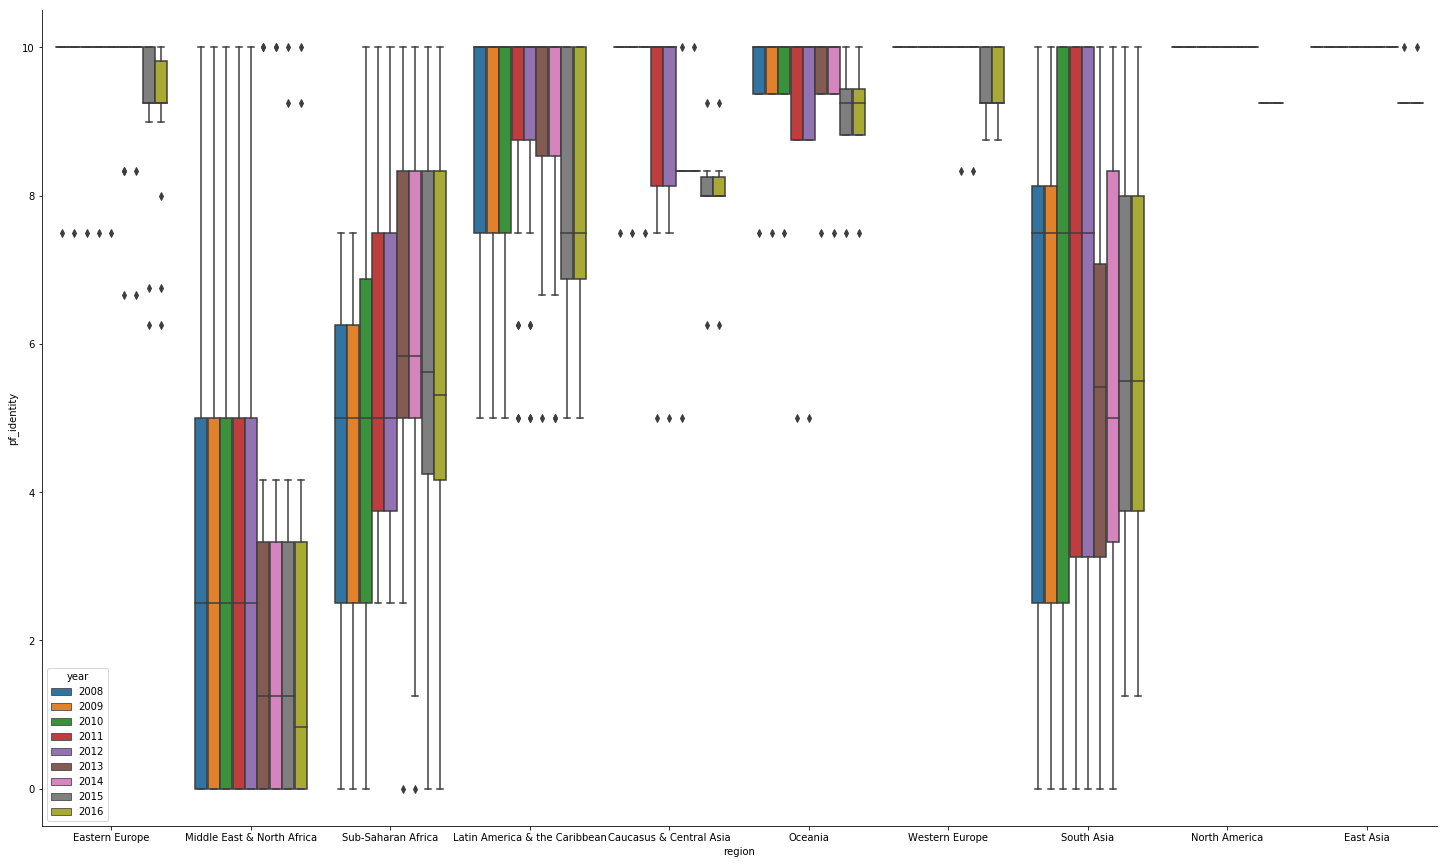

In [43]:
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='region', y='pf_identity', hue = 'year')

seaborn.despine()

Ahora vemos el de economic freedom score por region agrupando por anio.

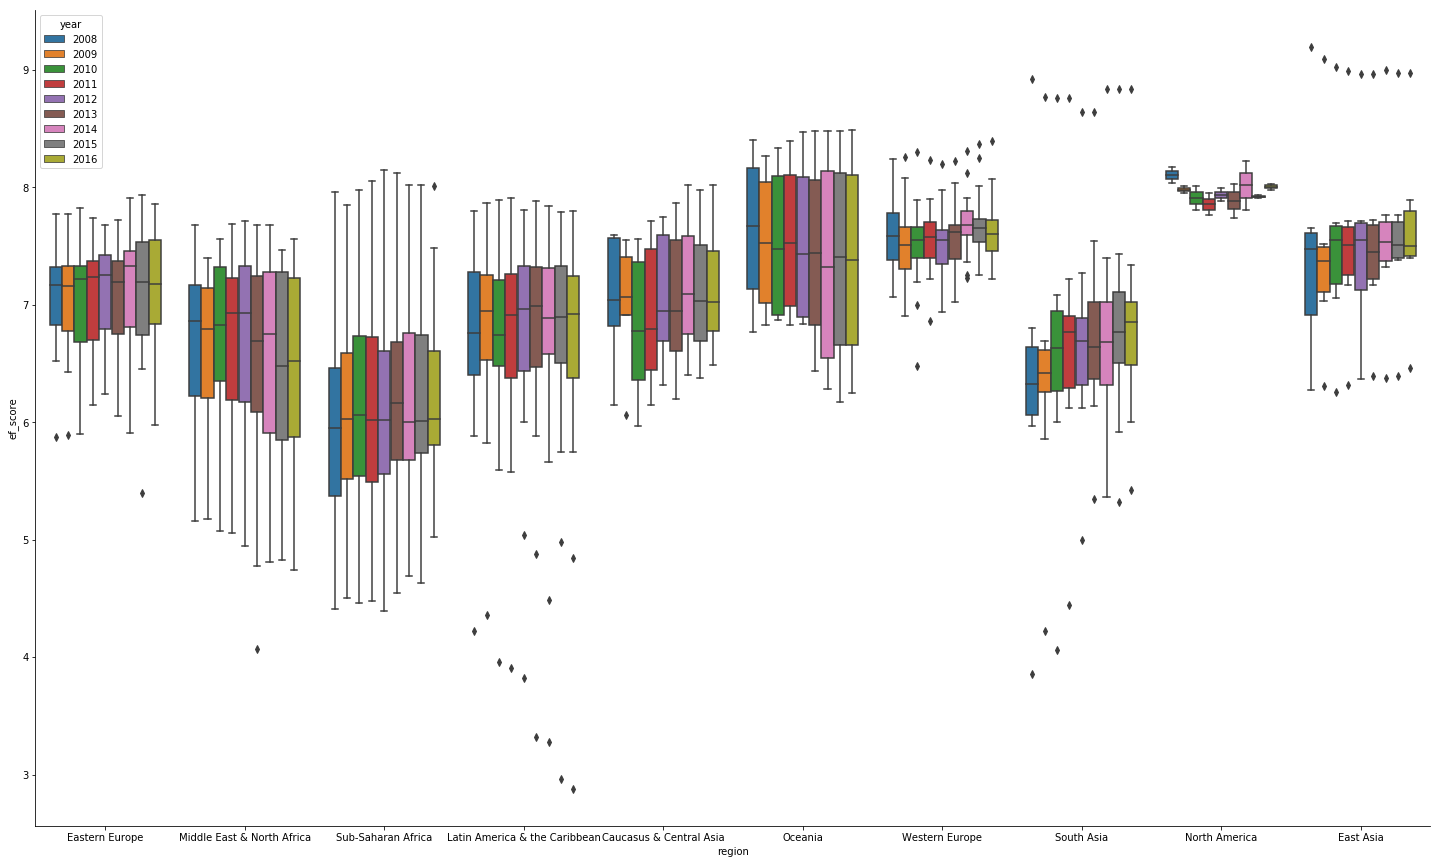

In [44]:
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='region', y='ef_score', hue = 'year')

seaborn.despine()

A continuacion el Human Freedom Score por region agrupando por anio.

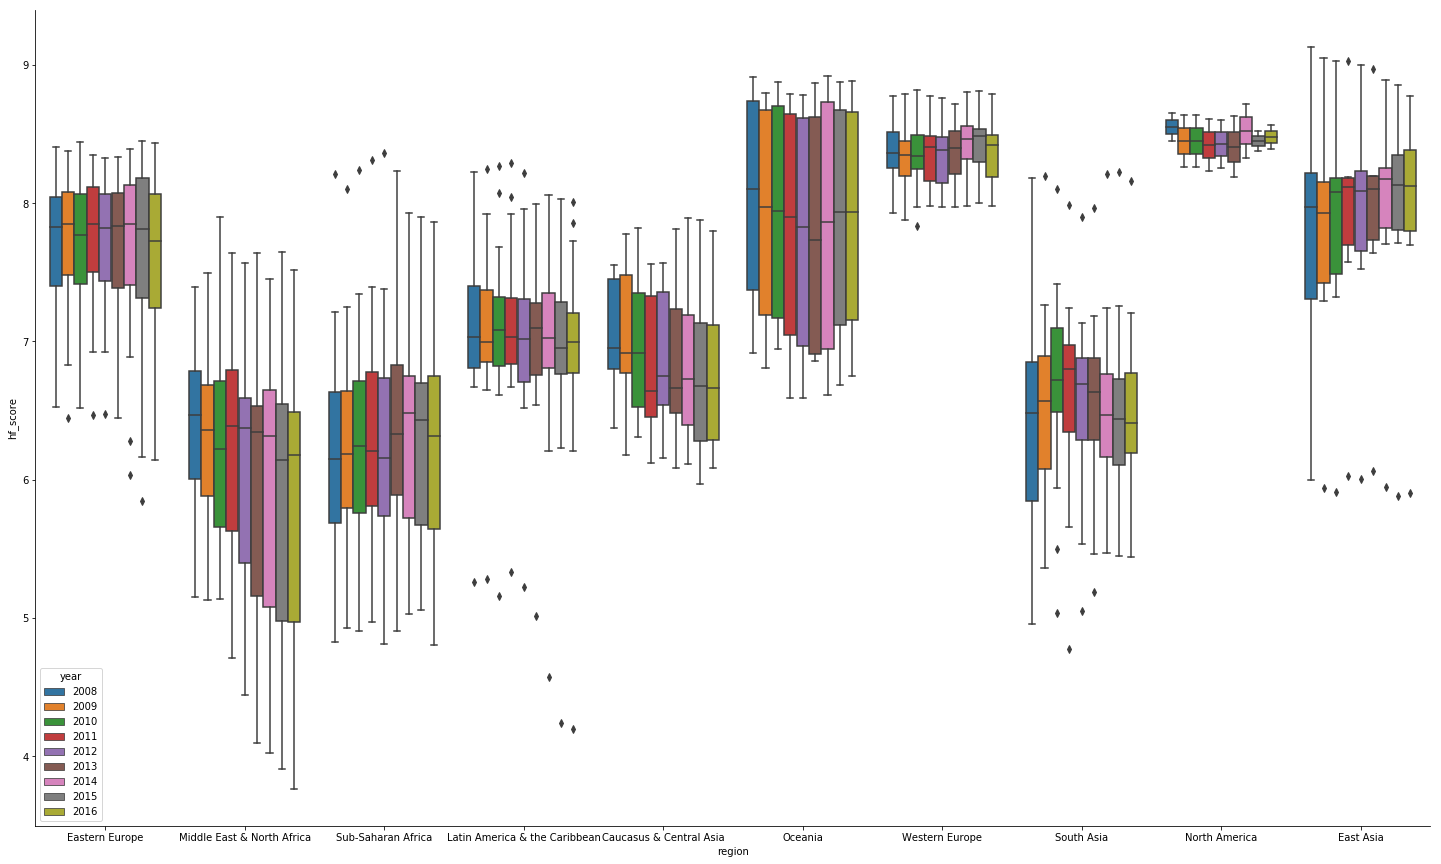

In [45]:
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='region', y='hf_score', hue = 'year')

seaborn.despine()

## Box Plot x = anios y = 'pf_identity', 'hf_score', 'ef_score'

Ahora calcularmos los boxplot por anio del conjunto de datos (sin dividir por regiones). El siguiente, personal freedom Identity

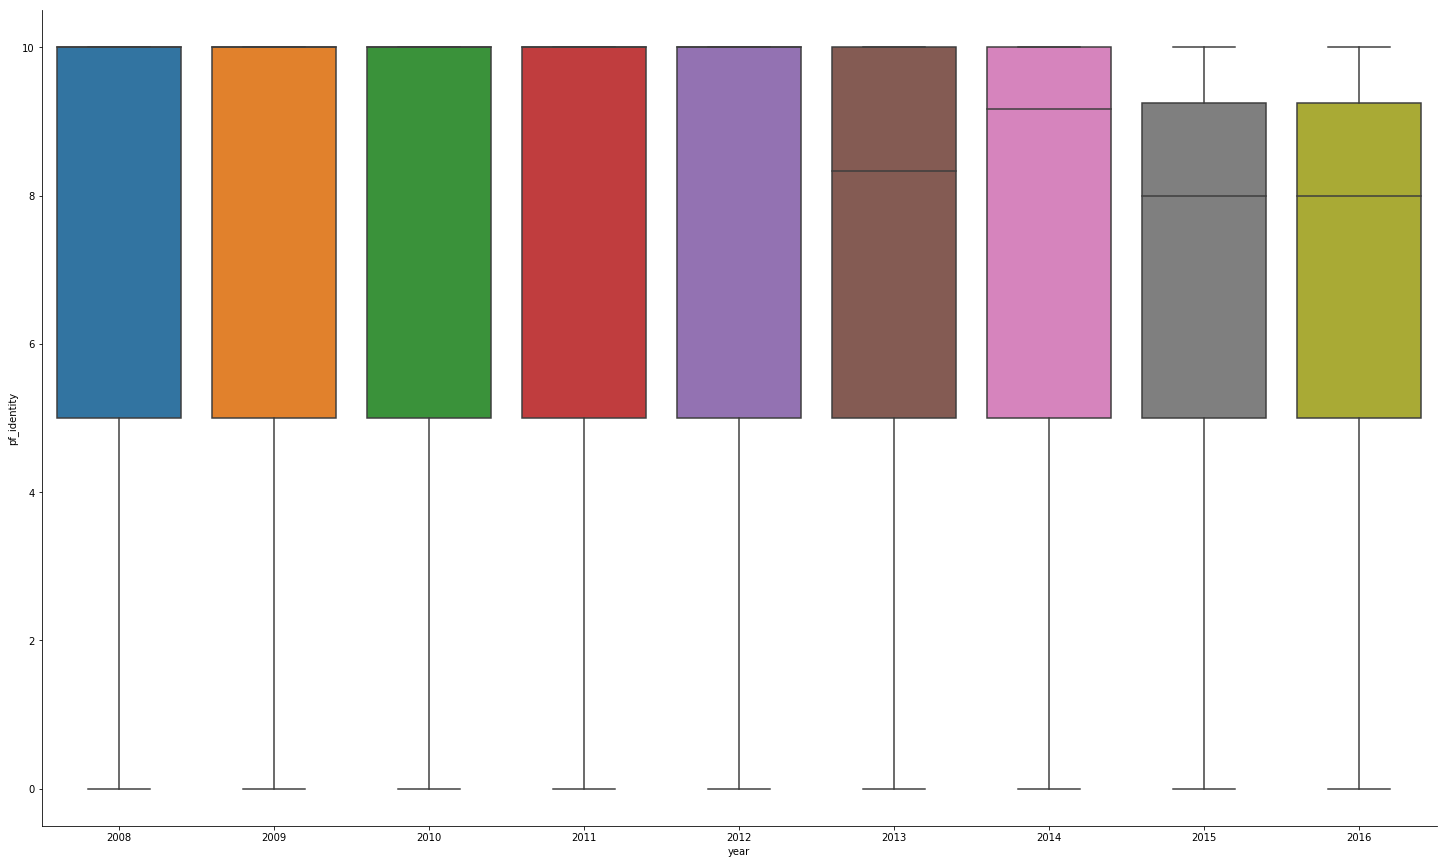

In [48]:
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='year', y='pf_identity')

seaborn.despine()

Igual para economic freedom score

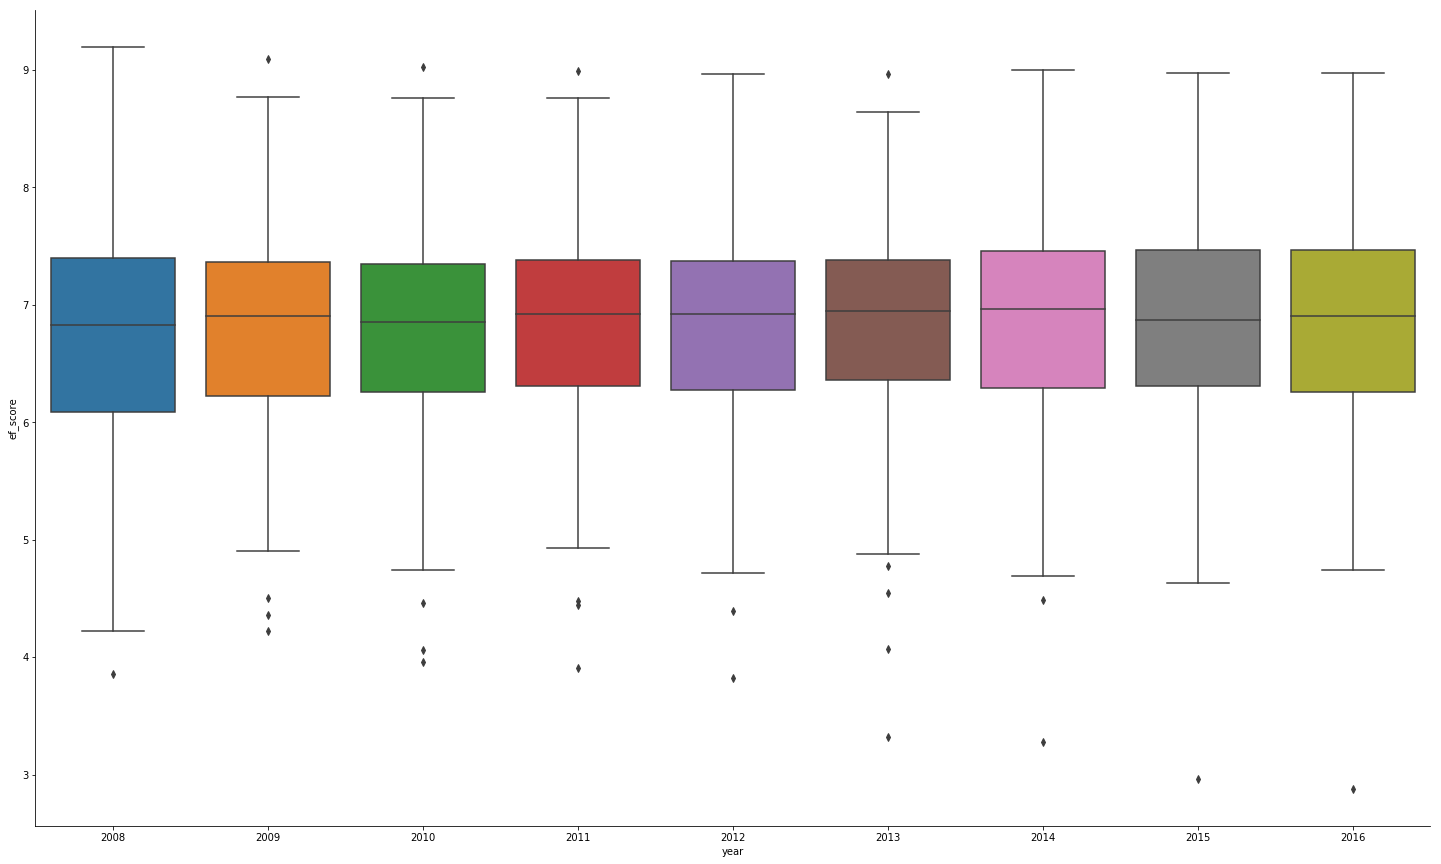

In [49]:
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='year', y='ef_score')

seaborn.despine()

Lo mismo para Human Freedom Score

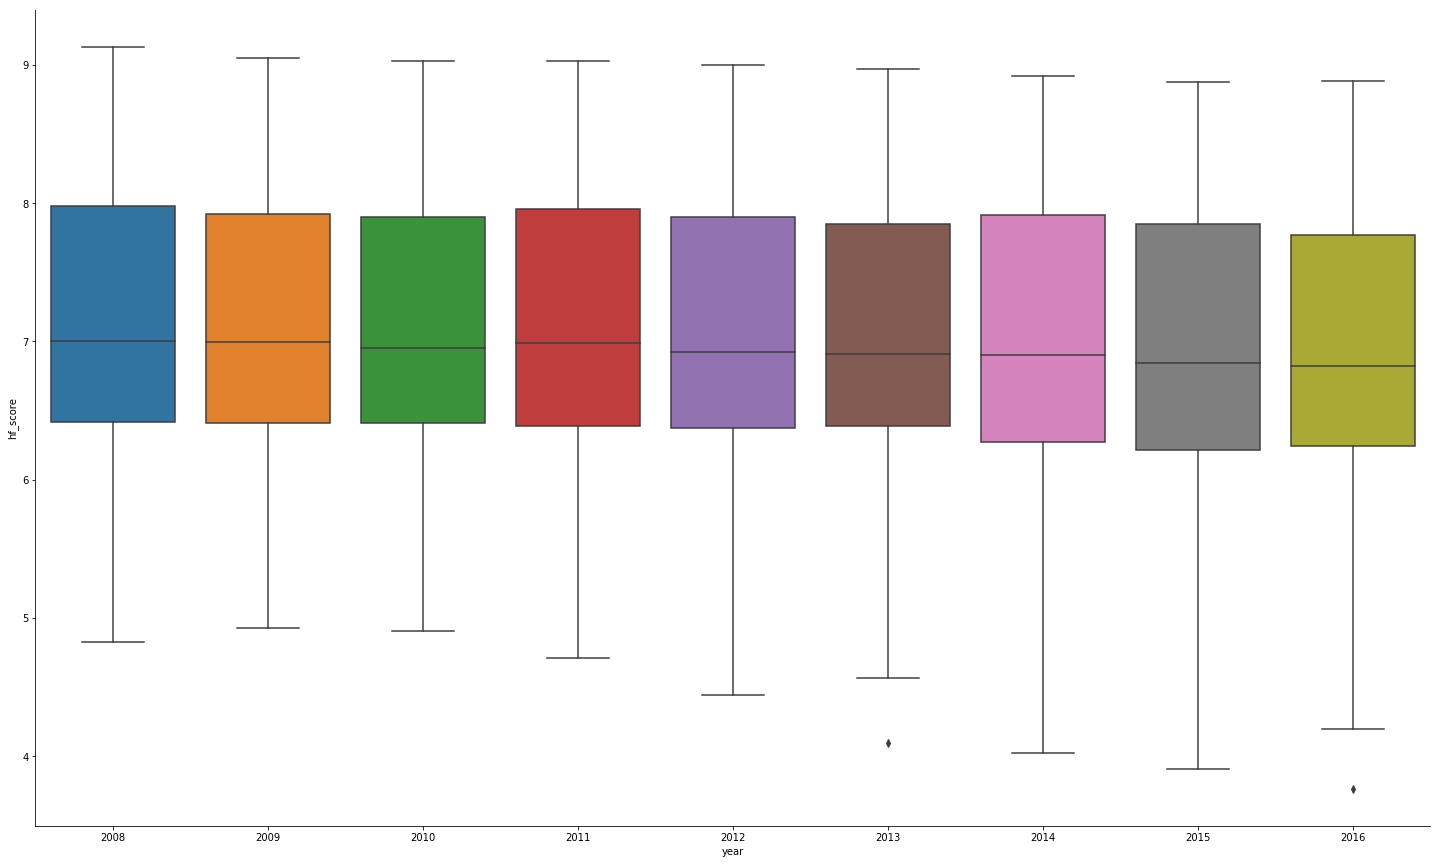

In [50]:
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='year', y='hf_score')

seaborn.despine()

## Ahora se hace un boxplot de las variables de importancia (pf_identity, hf_score y ef_score) sin agruparlos (tomando el conjunto de datos)

A continuacion pf_identity

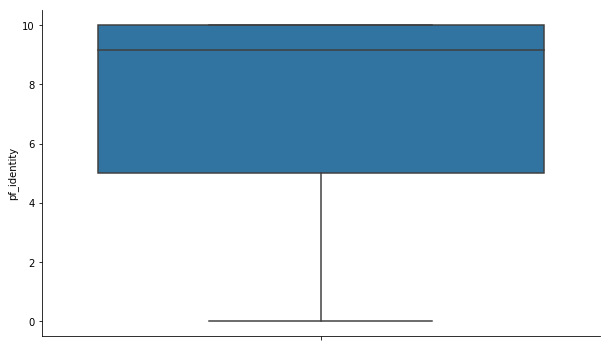

In [53]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset, y='pf_identity')

seaborn.despine()

El siguiente es el Economic Freedom Score

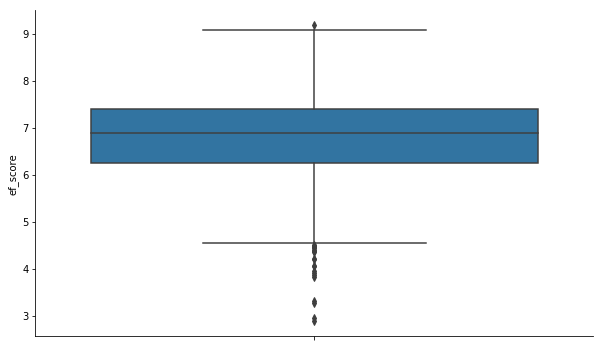

In [54]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset, y='ef_score')

seaborn.despine()

Por ultimo, el human freedom score

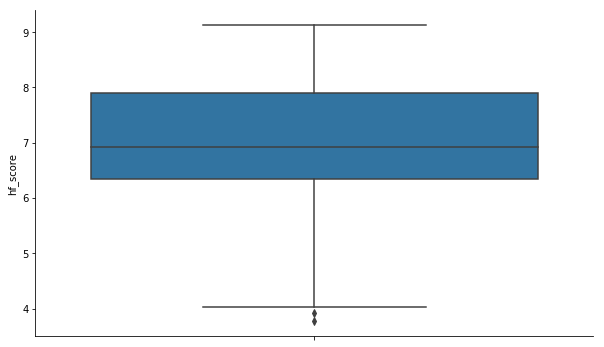

In [55]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=dataset, y='hf_score')

seaborn.despine()

# 2. Agregacion de Datos